In [2]:
from data_preprocess.pseudo_dataset_matching import PseudoMatchingDataset
from torch.utils.data import DataLoader
import torch

DEVICE = torch.device(0 if torch.cuda.is_available() else 'cpu')
print(DEVICE)
pseudo_matching_dataset = PseudoMatchingDataset(pairs_path='data/train_pairs/data_pairs.csv', descriptors_path='evaluation/sift_descriptors_outputs_n/merged.h5', descriptor_type='sift', device=DEVICE )

train_loader = DataLoader(pseudo_matching_dataset, batch_size=48, num_workers= 8, shuffle=False)

cuda:0


dataset_name
descriptors
image
image_name
image_path
keypoint_scores
keypoints
scene_name
[[[0.11135964 0.11135964 0.07443694 ... 0.02813452 0.01624347 0.03632151]
  [0.02762539 0.001      0.03906821 ... 0.02255604 0.001      0.01594953]
  [0.01698814 0.18840759 0.12367552 ... 0.03397628 0.01698814 0.00099999]
  ...
  [0.00099998 0.04809784 0.12725493 ... 0.01700515 0.00099998 0.00099998]
  [0.03175394 0.12800421 0.1384122  ... 0.0692061  0.16423264 0.01587697]
  [0.06903111 0.04881236 0.03780989 ... 0.001      0.03087165 0.1244476 ]]]
[[[631.3621  423.3435 ]
  [409.1497  550.4082 ]
  [716.9675  128.52116]
  ...
  [604.0397  305.78348]
  [360.62198 300.8976 ]
  [415.74936 928.547  ]]]
['peach_0131.png']
['amy_gardens']
['peach']


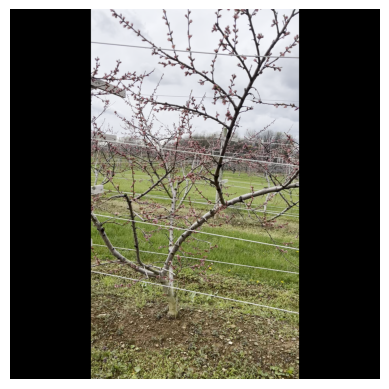

In [30]:
import h5py
import matplotlib.pyplot as plt

def print_h5_structure(name, obj):
    print(name)

with h5py.File("evaluation/sift_descriptors_outputs_n/1900_1024_sift.h5", "r") as f:
    f.visititems(print_h5_structure)
    print(f["descriptors"][:])
    print(f["keypoints"][:])
    print(f["image_name"].asstr()[:])
    print(f["dataset_name"].asstr()[:])
    print(f["scene_name"].asstr()[:])
    plt.imshow(np.transpose(f["image"][:].squeeze(), (1, 2, 0)), cmap="gray")
    plt.axis("off")
    plt.show()

In [ ]:
import h5py
from pathlib import Path
from feature_matching.lightglue_matcher import match_features_for_plots
import cv2 as cv
import numpy as np
from batch_matcher import process_batches
import os

# Set up output path
output_dir = Path('evaluation/matches_output/')

# Initialize output files for both matchers
lightglue_output = os.path.join(output_dir,'sift_lightglue_matches' )
output_dir.parent.mkdir(exist_ok=True, parents=True)

# Run both matchers
print("Running LightGlue matching...")
lightglue_matches = process_batches(
    train_loader,
    output_path=lightglue_output,
    device = DEVICE
)

print("\nMatching complete!")
print(f"LightGlue matches saved to: {lightglue_output}")


In [3]:
import json

with open("evaluation/graphs/lightglue_with_disk/graph_ETs.json", "r") as f:
    ets_graph = json.load(f)

ets_graph

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'outliers_out_et001.png'},
  {'id': 'outliers_out_et003.png'},
  {'id': 'outliers_out_et002.png'},
  {'id': 'et_et007.png'},
  {'id': 'et_et003.png'},
  {'id': 'et_et006.png'},
  {'id': 'et_et001.png'},
  {'id': 'et_et004.png'},
  {'id': 'et_et002.png'},
  {'id': 'et_et008.png'},
  {'id': 'et_et005.png'},
  {'id': 'et_et000.png'},
  {'id': 'another_et_another_et006.png'},
  {'id': 'another_et_another_et002.png'},
  {'id': 'another_et_another_et010.png'},
  {'id': 'another_et_another_et004.png'},
  {'id': 'another_et_another_et007.png'},
  {'id': 'another_et_another_et008.png'},
  {'id': 'another_et_another_et003.png'},
  {'id': 'another_et_another_et005.png'},
  {'id': 'another_et_another_et001.png'},
  {'id': 'another_et_another_et009.png'}],
 'edges': [{'weight': 11,
   'source': 'outliers_out_et001.png',
   'target': 'et_et008.png'},
  {'weight': 10, 'source': 'outliers_out_et001.png', 'target': 'et_et005.png'

In [7]:
import networkx as nx

ets_graph = nx.node_link_graph(ets_graph, edges="edges")
ets_graph.edges(data=True)

EdgeDataView([('outliers_out_et001.png', 'et_et008.png', {'weight': 11}), ('outliers_out_et001.png', 'et_et005.png', {'weight': 10}), ('outliers_out_et001.png', 'et_et000.png', {'weight': 7}), ('outliers_out_et001.png', 'another_et_another_et006.png', {'weight': 17}), ('outliers_out_et001.png', 'another_et_another_et002.png', {'weight': 11}), ('outliers_out_et001.png', 'another_et_another_et010.png', {'weight': 13}), ('outliers_out_et001.png', 'another_et_another_et004.png', {'weight': 7}), ('outliers_out_et001.png', 'another_et_another_et007.png', {'weight': 12}), ('outliers_out_et001.png', 'another_et_another_et003.png', {'weight': 11}), ('outliers_out_et001.png', 'another_et_another_et001.png', {'weight': 12}), ('outliers_out_et001.png', 'another_et_another_et009.png', {'weight': 15}), ('outliers_out_et001.png', 'outliers_out_et002.png', {'weight': 7}), ('outliers_out_et001.png', 'et_et003.png', {'weight': 7}), ('outliers_out_et001.png', 'et_et006.png', {'weight': 7}), ('outliers_ou

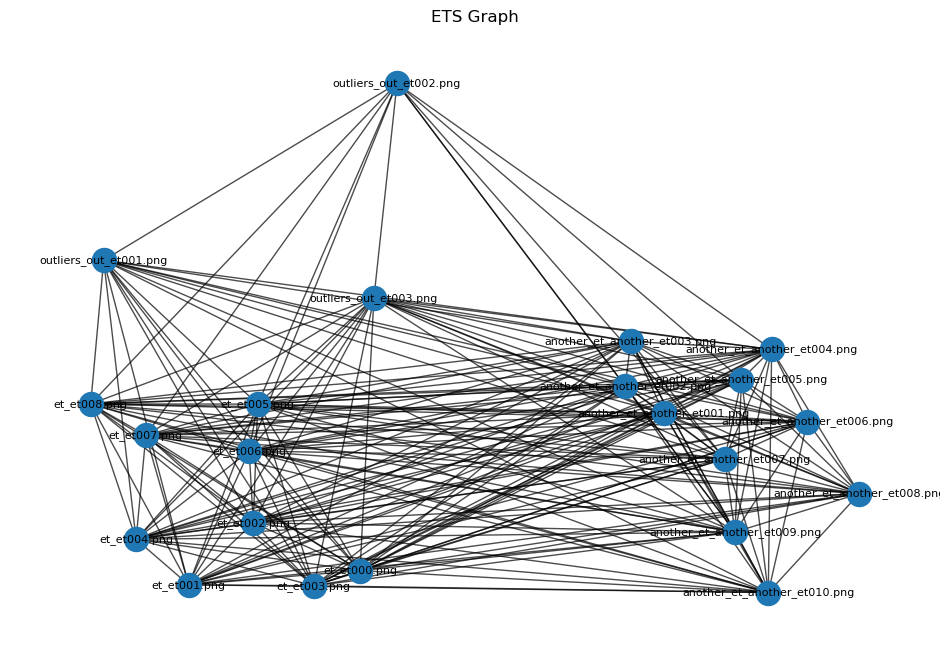

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(ets_graph, seed=42)
nx.draw_networkx_nodes(ets_graph, pos, node_size=300)
nx.draw_networkx_edges(ets_graph, pos, width=1.0, alpha=0.7)
nx.draw_networkx_labels(ets_graph, pos, font_size=8)
plt.title("ETS Graph")
plt.axis("off")
plt.show()


In [5]:
with open("evaluation/clusters/clusters_lightglue_with_disk.json", "r") as f:
    lightglue_disk_cluster = json.load(f)

lightglue_disk_cluster

{'imc2023_haiper': {'clusters': {'0': ['fountain_image_116.png',
    'fountain_image_108.png',
    'fountain_image_101.png',
    'fountain_image_025.png',
    'fountain_image_033.png',
    'fountain_image_173.png',
    'fountain_image_041.png',
    'fountain_image_166.png',
    'fountain_image_163.png',
    'fountain_image_155.png'],
   '3': ['fountain_image_082.png',
    'fountain_image_000.png',
    'fountain_image_007.png',
    'fountain_image_012.png',
    'fountain_image_214.png',
    'fountain_image_143.png',
    'fountain_image_136.png'],
   '2': ['bike_image_119.png',
    'bike_image_139.png',
    'bike_image_137.png',
    'bike_image_062.png',
    'chairs_image_051.png',
    'chairs_image_160.png',
    'chairs_image_155.png'],
   '4': ['bike_image_115.png',
    'bike_image_038.png',
    'bike_image_049.png',
    'bike_image_029.png',
    'bike_image_150.png',
    'bike_image_004.png',
    'bike_image_128.png',
    'bike_image_076.png',
    'bike_image_088.png',
    'bike_image

In [ ]:
# create interactive graph

interactive_graph(graph_lightglue_sift, cluster_lightglue_sift, os.path.join(visualization_dir, "lightglue_with_sift"))